In [17]:
# ! sudo apt-get install portaudio19-dev python-all-dev
# lets leave the idea of adding audio functionality

## importing necessary libraries

In [3]:
import os

# for labeling and preprocessing
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# for model
# import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# for
import matplotlib.pyplot as plt

# for saving the model
from tensorflow.keras.models import load_model

# for unzipping
# import gzip
import zipfile
import shutil

In [2]:
import cv2
import os
import tensorflow as tf
import numpy as np
import joblib

## data collection

In [3]:
# # function for capturing video

# def collect_video(output_path, num_samples):
#     '''
#     This function captures video from the default camera and saves the video
#     in the specified directory.
#     '''
    
#     if not os.path.exists(output_path):
#         os.makedirs(output_path)
    
#     capture = cv2.VideoCapture(0)
    
#     sample_count = 0
    
#     while True:
#         ret, frame = capture.read()
        
#         cv2.imshow('Frame', frame)
        
#         # f_name = os.path.join(output_path, f'sample_{sample_count}.jpg')
#         f_name = os.path.join(output_path, f'sample2_{sample_count}.jpg') # for 2nd sample collection
#         cv2.imwrite(f_name, frame)
#         # print(f"Saved: {f_name}")
        
#         sample_count += 1
        
#         if sample_count >= num_samples:
#             print(f'{sample_count} samples collected in {output_path}.')
#             break
        
#         if cv2.waitKey(1000//10) & 0xFF == ord('q'):
#             break
#     capture.release()
#     cv2.destroyAllWindows()
            

In [24]:
# with pause resume functionalities

def collect_samples(output_path, num_samples):
    '''
    This function captures video from the default camera and saves the video
    in the specified directory. Press 'p' to pause and 'r' to resume.
    '''
    
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    capture = cv2.VideoCapture(0)
    
    sample_count = 0
    paused = False
    
    while True:
        if not paused:
            ret, frame = capture.read()
            
            cv2.imshow('Frame', frame)
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # f_name = os.path.join(output_path, f'sample_{sample_count}.jpg')
            f_name = os.path.join(output_path, f'{output_path}_{sample_count}.jpg') # for 2nd sample collection
            cv2.imwrite(f_name, gray_frame)
            # print(f"Saved: {f_name}")
            
            sample_count += 1
            
            if sample_count >= num_samples:
                print(f'{sample_count} samples collected in {output_path}.')
                break
        
        key = cv2.waitKey(1000//10) & 0xFF
        if key == ord('q'):
            print(f'{sample_count} samples collected in {output_path}.')
            break
        elif key == ord('p'):  # Pause collection
            paused = True
            print("Paused collection.")
        elif key == ord('r'):  # Resume collection
            paused = False
            print("Resumed collection.")
            
    capture.release()
    cv2.destroyAllWindows()


In [8]:
# output_path = './normal'
output_path = './normal3' # for 2nd batch samples
num_samples = 5000
collect_samples(output_path, num_samples)

1031 samples collected in ./normal3.


In [12]:
# output_path = './suspicious'
output_path = './suspicious3' # for 2ndd batch samples
num_samples = 5000
collect_samples(output_path, num_samples)

1462 samples collected in ./suspicious3.


In [25]:
# output_path = './suspicious'
output_path = './suspicious4' # for 2ndd batch samples
num_samples = 5000
collect_samples(output_path, num_samples)

693 samples collected in ./suspicious4.


In [15]:
import cv2
import os

def collect_data(output_dir, num_samples):
    """
    Collects data from webcam and saves frames to specified directory.

    Parameters:
        output_dir (str): Directory to save captured frames.
        num_samples (int): Number of samples to collect.

    Returns:
        None
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize video capture from webcam
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam

    sample_count = 0

    while True:
        ret, frame = cap.read()  # Capture frame-by-frame

        # Display the frame
        cv2.imshow('Frame', frame)

        # Save the frame to output directory
        filename = os.path.join(output_dir, f"sample_{sample_count}.jpg")
        cv2.imwrite(filename, frame)
        print(f"Saved: {filename}")

        sample_count += 1

        # Break the loop if specified number of samples is collected
        if sample_count >= num_samples:
            break

        # Press 'q' to quit the loop
        if cv2.waitKey(1000//30) & 0xFF == ord('q'):
            break

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()



In [ ]:
# taking samples
output_directory = "data"  # Directory to save captured frames
num_samples_to_collect = 1000  # Number of samples to collect
collect_data(output_directory, num_samples_to_collect)

## resizing and saving in another folder

In [18]:
# function for resizing and saving in a different folder
def resize_images(input_path, output_path, target_size=(128, 128)):
    '''
    Resize all images in the input path to the target size and save them to the output path.
    '''
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    count = 0
    
    for filename in os.listdir(input_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image
            img_path = os.path.join(input_path, filename)
            img = cv2.imread(img_path)

            # Resize image to target size
            # resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
            resized_img = cv2.resize(img, target_size)

            # Save resized image to output path
            output_img_path = os.path.join(output_path, filename)
            cv2.imwrite(output_img_path, resized_img)
            count += 1

    print(f"{count} images Resized and saved in {output_path}")

# # Example usage:
# input_path = "input_images"
# output_path = "resized_images"
# target_size = (200, 200)  # Specify the target size (width, height) in pixels

# resize_images(input_path, output_path, target_size)

In [20]:
normal_im_paths = ['./normal2', './normal3']
target_size = (192, 192)
for path in normal_im_paths:
    output_path = './normal_resized2'
    resize_images(path, output_path, target_size)

3059 images Resized and saved in ./normal_resized2
1026 images Resized and saved in ./normal_resized2


In [27]:
normal_im_paths = ['./suspicious2', './suspicious3', './suspicious4']
target_size = (192, 192)
for path in normal_im_paths:
    output_path = './suspicious_resized2'
    resize_images(path, output_path, target_size)

3053 images Resized and saved in ./suspicious_resized2
1239 images Resized and saved in ./suspicious_resized2
693 images Resized and saved in ./suspicious_resized2


## for audio functionalities

In [19]:
# with audio functionality

# import cv2
# import numpy as np
# import pyaudio
# import wave

# # Define video capture parameters
# cap = cv2.VideoCapture(0)  # Use 0 for default webcam
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define audio recording parameters
# audio_format = pyaudio.paInt16  # 16-bit PCM audio
# channels = 1  # Mono audio
# sample_rate = 44100  # Sample rate (samples per second)
# chunk_size = 1024  # Number of frames per buffer

# # Initialize PyAudio object for audio recording
# audio = pyaudio.PyAudio()

# # Create an audio stream for recording
# stream = audio.open(format=audio_format,
#                     channels=channels,
#                     rate=sample_rate,
#                     input=True,
#                     frames_per_buffer=chunk_size)

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi', fourcc, 20.0, (frame_width, frame_height))

# # Main loop for capturing video and audio
# while True:
#     ret, frame = cap.read()  # Capture frame-by-frame

#     # Record audio
#     audio_data = stream.read(chunk_size, exception_on_overflow=False)

#     # Write the frame to the video file
#     out.write(frame)

#     # Display the frame (optional)
#     cv2.imshow('Frame', frame)

#     # Stop the loop if 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release resources
# cap.release()
# out.release()
# cv2.destroyAllWindows()
# stream.stop_stream()
# stream.close()
# audio.terminate()


### Data Labeling

In [7]:
# # function for labeling the data

# def label_images(data_dir, output_file):
#     """
#     Labels the images in the specified directory and saves the labels to a file.

#     Parameters:
#         data_dir (str): Directory containing the image data.
#         output_file (str): Path to the output file to save the labels.

#     Returns:
#         None
#     """
#     # Open or create the output file for writing
#     with open(output_file, 'w') as file:
#         # Iterate over the subdirectories (classes) in the data directory
#         for class_name in os.listdir(data_dir):
#             class_dir = os.path.join(data_dir, class_name)
#             # Check if it's a directory
#             if os.path.isdir(class_dir):
#                 # Iterate over the images in the class directory
#                 for filename in os.listdir(class_dir):
#                     image_path = os.path.join(class_dir, filename)
#                     print(image_path)
#                     # Read the image
#                     image = cv2.imread(image_path)
#                     # Display the image (optional)
#                     cv2.imshow('Image', image)
#                     # Wait for key press (optional)
#                     key = cv2.waitKey(0) & 0xFF
#                     # Label the image based on key press (in this example, 'n' for normal, 's' for suspicious)
#                     if key == ord('n'):
#                         label = 'normal'
#                     elif key == ord('s'):
#                         label = 'suspicious'
#                     else:
#                         label = 'unknown'
#                     # Write the label and image path to the output file
#                     file.write(f"{image_path},{label}\n")
#                     print(f"Labeled: {image_path} as {label}")


# # # Example usage:
# # data_directory = "data"  # Directory containing image data
# # output_file_path = "labels.txt"  # Output file to save labels
# # label_images(data_directory, output_file_path)


In [11]:
# function for labeling the data

def label_images(data_dir, output_file):
    """
    Labels the images in the specified directory and saves the labels to a file.

    Parameters:
        data_dir (str): Directory containing the image data.
        output_file (str): Path to the output file to save the labels.

    Returns:
        None
    """
    # Open or create the output file for writing
    with open(output_file, 'w') as file:
        # Iterate over the subdirectories (classes) in the data directory
        for class_name in os.listdir(data_dir):
            class_dir = os.path.join(data_dir, class_name)
            # Check if it's a directory
            if os.path.isdir(class_dir):
                # Iterate over the images in the class directory
                for filename in os.listdir(class_dir):
                    image_path = os.path.join(class_dir, filename)
                    print(image_path)
                    # Read the image
                    image = cv2.imread(image_path)
                    # Display the image (optional)
                    cv2.imshow('Image', image)
                    # Wait for key press (optional)
                    key = cv2.waitKey(0) & 0xFF
                    # Label the image based on key press (in this example, 'n' for normal, 's' for suspicious)
                    if key == ord('n'):
                        label = 'normal'
                    elif key == ord('s'):
                        label = 'suspicious'
                    else:
                        label = 'unknown'
                    # Write the label and image path to the output file
                    file.write(f"{image_path},{label}\n")
                    print(f"Labeled: {image_path} as {label}")


In [ ]:

data_directory = "./output"  # Directory containing image data
output_file_path = "labels.txt"  # Output file to save labels
label_images(data_directory, output_file_path)

In [9]:
import cv2
import numpy as np
# from sklearn.externals import joblib
import joblib

# Load pre-trained machine learning model
# model = joblib.load('model.pkl')

# Initialize video capture from webcam
cap = cv2.VideoCapture(0)  # Use 0 for default webcam

while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    
    # Preprocess the frame (e.g., resize, convert to grayscale)
    # preprocess_frame = preprocess(frame)
    
    # Extract features from the preprocessed frame
    # features = extract_features(preprocess_frame)
    
    # Predict using the trained model
    # prediction = model.predict(features)
    
    # Example: Simulate random prediction for demonstration
    prediction = np.random.choice(['normal', 'suspicious'])
    # print(prediction, type(prediction))
    # Display the frame with prediction (optional)
    if prediction == 'normal':
        color = (0, 255, 0) # green for normal text
    else:
        color = (0, 0, 255) # red for suspicious text
    
    cv2.putText(frame, prediction, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.imshow('Frame', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [35]:
cap = cv2.VideoCapture(0)

retcap.read()

[ WARN:0@8379.410] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@8379.423] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


(False, None)

## model building and loading weights or loading model

In [3]:
# Define the CNN model architecture using functional API
def create_cnn_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    # outputs = layers.Dense(2, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification
    outputs = layers.Dense(2, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Compile the model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
def train_model(model, train_data, validation_data, epochs):
    history = model.fit(train_data[0], train_data[1], epochs=epochs,
                        validation_data=validation_data)
    return history

# # Reshape the data (assuming grayscale images)
# X_train = X_train.reshape(-1, height, width, 1)
# X_val = X_val.reshape(-1, height, width, 1)

# input_shape = (height, width, 1)  # Input shape of the images
# num_classes = 1  # Number of classes (binary classification)


# # Train the model
# epochs = 10
# train_data = (X_train, y_train)
# validation_data = (X_val, y_val)
# history = train_model(model, train_data, validation_data, epochs)


In [4]:
# Create the CNN model using functional API
model = create_cnn_model((192,192,1))

# Compile the model
compile_model(model)

2024-02-29 15:30:52.846535: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
# loading weights to the model
# model.load_weights('gpu2_model_w.keras')
model.load_weights('gpu2_model_w.keras')

## model trained in online

## testing model

In [6]:
def process_img(img, img_size=(192,192)):
    # resizing
    processed_img = cv2.resize(img, img_size)
    # # grayscale conversion
    # processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)
    # normalizing
    processed_img = processed_img/255
    return processed_img

In [7]:
# defining the label mapping if not already done
label_map = {0:'normal', 1:'suspicious'}

In [8]:
# import cv2
# import numpy as np
# from sklearn.externals import joblib

# Load pre-trained machine learning model
# model = joblib.load('model.pkl')

from tensorflow.keras.models import load_model

# Initialize video capture from webcam
cap = cv2.VideoCapture(0)  # Use 0 for default webcam

# Load the face detection classifier from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Eye detection classifier from OpenCV
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# model = load_model("gpu_model.h5")
# model = load_model("model.h5")

while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    
    # Preprocess the frame (e.g., resize, convert to grayscale)
    # preprocess_frame = preprocess(frame)
    
    # Extract features from the preprocessed frame
    # features = extract_features(preprocess_frame)

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Preprocessing
    processed_frame = process_img(gray)
    
    # exapnding the dimension so that it will match the dimension of the input shape of the model
    processed_frame = np.expand_dims(processed_frame, axis=0)
    
    # print([processed_frame].shape) # use for checking purpose
    
    # Predict using the trained model
    prediction = model.predict(processed_frame)

    ## converting the prediction back to labels
    # get the index of the class with the highest probability (argmax)
    predicted_index = np.argmax(prediction)
    # convert the predicted index to the corresponding original label
    predicted_label = label_map[predicted_index]
    
    # Example: Simulate random prediction for demonstration
    # prediction = np.random.choice(['normal', 'suspicious'])
    print(predicted_label)
    # Define text color based on prediction
    if predicted_label == 'normal':
        text_color = (0, 255, 0)  # Green for normal behavior
    else:
        text_color = (0, 0, 255)  # Red for suspicious behavior
    
    # Display the frame with prediction and colored text
    cv2.putText(frame, predicted_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)
    

    # eye and face detection
        
    # # Draw rectangles around detected faces
    # for (x, y, w, h) in faces:
    #     cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Loop over detected faces
    for (x, y, w, h) in faces:
        # drawing rectangles over face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
        # Extract the region of interest (ROI) for the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # # Loop over detected eyes rectangle
        # for (ex, ey, ew, eh) in eyes:
        #     # Draw rectangles around detected eyes
        #     cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
        # Loop over detected eyes
        for (ex, ey, ew, eh) in eyes:
            # Calculate the center coordinates of the eye
            center = (int(ex + ew / 2), int(ey + eh / 2))
            # Calculate the radius of the circle
            radius = int(min(ew, eh) / 2)
            # Draw a circle around the eye
            cv2.circle(roi_color, center, radius, (0, 255, 0), 2)

    
    cv2.imshow('Frame', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1000//30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 292ms/step
suspicious
1/1 [==============================] - 0s 33ms/step
suspicious
1/1 [==============================] - 0s 25ms/step
suspicious
1/1 [==============================] - 0s 28ms/step
suspicious
1/1 [==============================] - 0s 25ms/step
suspicious
1/1 [==============================] - 0s 27ms/step
suspicious
1/1 [==============================] - 0s 26ms/step
suspicious
1/1 [==============================] - 0s 26ms/step
suspicious
1/1 [==============================] - 0s 29ms/step
suspicious
1/1 [==============================] - 0s 25ms/step
suspicious
1/1 [==============================] - 0s 27ms/step
suspicious
1/1 [==============================] - 0s 24ms/step
suspicious
1/1 [==============================] - 0s 26ms/step
suspicious
1/1 [==============================] - 0s 28ms/step
suspicious
1/1 [==============================] - 0s 25ms/step
suspicious
1/1 [==============================] - 0s 27ms/step
su

Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation


1/1 [==============================] - 0s 24ms/step
suspicious
1/1 [==============================] - 0s 24ms/step
suspicious
1/1 [==============================] - 0s 24ms/step
suspicious
1/1 [==============================] - 0s 27ms/step
suspicious
1/1 [==============================] - 0s 26ms/step
normal
1/1 [==============================] - 0s 33ms/step
normal
1/1 [==============================] - 0s 32ms/step
normal
1/1 [==============================] - 0s 33ms/step
normal
1/1 [==============================] - 0s 38ms/step
suspicious
1/1 [==============================] - 0s 25ms/step
suspicious
1/1 [==============================] - 0s 24ms/step
suspicious
1/1 [==============================] - 0s 24ms/step
suspicious
1/1 [==============================] - 0s 28ms/step
suspicious
1/1 [==============================] - 0s 26ms/step
normal
1/1 [==============================] - 0s 28ms/step
normal
1/1 [==============================] - 0s 42ms/step
normal
1/1 [===============

## face detection Using HaraCascade
for face detection from image

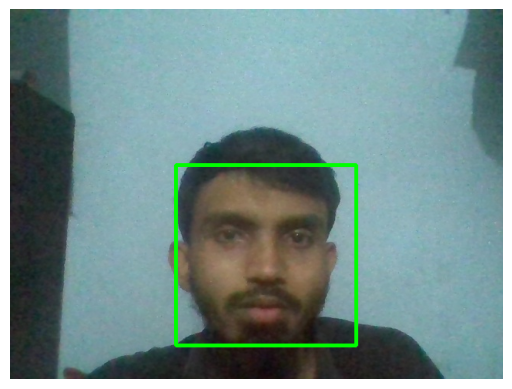

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the face detection classifier from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in an image and plot the results
def detect_faces_and_plot(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with detected faces
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Test the face detection function with an example image
image_path = '/media/manuar/D1/Documents/My_Projects/Computer_Vision/exam_proctoring_system/output/sample_1.jpg'  # Replace with the path to your image
detect_faces_and_plot(image_path)

## detecting face in camera stream

In [12]:
import cv2
import numpy as np
import joblib

# Load pre-trained machine learning model
# model = joblib.load('model.pkl')

# Initialize video capture from webcam
cap = cv2.VideoCapture(0)  # Use 0 for default webcam

# Load the face detection classifier from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    
    # Preprocess the frame (e.g., resize, convert to grayscale)
    # preprocess_frame = preprocess(frame)
    
    # Extract features from the preprocessed frame
    # features = extract_features(preprocess_frame)
    
    # Predict using the trained model
    # prediction = model.predict(features)
    
    # Example: Simulate random prediction for demonstration
    prediction = np.random.choice(['normal', 'suspicious'])
    
    # Define text color based on prediction
    if prediction == 'normal':
        text_color = (0, 255, 0)  # Green for normal behavior
    else:
        text_color = (0, 0, 255)  # Red for suspicious behavior
    
    # Display the frame with prediction and colored text
    cv2.putText(frame, prediction, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

    
    # # Convert BGR image to RGB for displaying with matplotlib
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
    cv2.imshow('Frame', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1000//5) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

## eyeball detection

In [ ]:
import cv2

# Load the pre-trained Haar Cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

im_path = '/media/manuar/D1/Documents/My_Projects/Computer_Vision/exam_proctoring_system/output/sample_1.jpg'
# Read the image
image = cv2.imread(im_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop over detected faces
for (x, y, w, h) in faces:
    # Extract the region of interest (ROI) for the face
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # # Loop over detected eyes rectangle
    # for (ex, ey, ew, eh) in eyes:
    #     # Draw rectangles around detected eyes
    #     cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Loop over detected eyes
    for (ex, ey, ew, eh) in eyes:
        # Calculate the center coordinates of the eye
        center = (int(ex + ew / 2), int(ey + eh / 2))
        # Calculate the radius of the circle
        radius = int(min(ew, eh) / 2)
        # Draw a circle around the eye
        cv2.circle(roi_color, center, radius, (0, 255, 0), 2)



# Display the result
cv2.imshow('Eye Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Lip movement detection

In [ ]:
import cv2
import numpy as np

# Load the cascade for mouth detection
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    # Read the frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect the mouth in the image
    mouths = mouth_cascade.detectMultiScale(gray, scaleFactor=1.7, minNeighbors=11, minSize=(10, 10))

    # Draw a rectangle around each mouth and calculate aspect ratio
    for (x, y, w, h) in mouths:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # aspect_ratio = float(w)/h
        # print('Aspect Ratio: ', aspect_ratio)

    # Display the frame
    coord = f"{x}, {y}, {w}, {h}"
    print(x, y, w, h)
    cv2.putText(frame, coord, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.imshow('frame', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1000//30) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close windows
cap.release()
cv2.destroyAllWindows()

## Liveness detection

In [51]:
import numpy as np
import cv2
# from sklearn.externals import joblib
import joblib
import argparse
# from time import gmtime, strftime
# from sklearn.ensemble import forest


def detect_face(img, faceCascade):
    faces = faceCascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(110, 110)
        #flags = cv2.CV_HAAR_SCALE_IMAGE
    )
    return faces


def calc_hist(img):
    histogram = [0] * 3
    for j in range(3):
        histr = cv2.calcHist([img], [j], None, [256], [0, 256])
        histr *= 255.0 / histr.max()
        histogram[j] = histr
    return np.array(histogram)


# ap = argparse.ArgumentParser()
# ap.add_argument("-n", "--name", required=True, help="name of trained model to perform spoofing detection")
# ap.add_argument("-d", "--device", required=True, help="camera identifier/video to acquire the image")
# ap.add_argument("-t", "--threshold", required=False, help="threshold used for the classifier to decide between genuine and a spoof attack")
# args = vars(ap.parse_args())

# if __name__ == "__main__":

# # Load model
# clf = None
# try:
#     clf = joblib.load("replay-attack_ycrcb_luv_extraTreesClassifier.pkl")
# except IOError as e:
#     print "Error loading model <"+args["name"]+">: {0}".format(e.strerror)
#     exit(0)

clf = joblib.load("face_spoofing.pkl")
cap = cv2.VideoCapture(0)

# # Open the camera
# if '.' in args["device"]:
#     # cap = cv2.VideoCapture(args["device"])
#     cap = cv2.VideoCapture(0)
# else:
#     cap = cv2.VideoCapture(int(args["device"]))
# if not cap.isOpened():
#     print ("Error opening camera")
#     exit(0)

width = 320
height = 240
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
# cap.set(cv2.CAP_PROP_AUTOFOCUS, 1)

# # Initialize face detector
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

sample_number = 10
count = 0
measures = np.zeros(sample_number, dtype=np.float)

while True:
    ret, img_bgr = cap.read()
    if ret is False:
        print("Error grabbing frame from camera")
        break

    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    faces = detect_face(img_gray, faceCascade)

    measures[count%sample_number]=0

    point = (0,0)
    for i, (x, y, w, h) in enumerate(faces):

        roi = img_bgr[y:y+h, x:x+w]

        img_ycrcb = cv2.cvtColor(roi, cv2.COLOR_BGR2YCR_CB)
        img_luv = cv2.cvtColor(roi, cv2.COLOR_BGR2LUV)

        ycrcb_hist = calc_hist(img_ycrcb)
        luv_hist = calc_hist(img_luv)

        feature_vector = np.append(ycrcb_hist.ravel(), luv_hist.ravel())
        feature_vector = feature_vector.reshape(1, len(feature_vector))

        prediction = clf.predict_proba(feature_vector)
        prob = prediction[0][1]

        measures[count % sample_number] = prob

        cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (255, 0, 0), 2)

        point = (x, y-5)

        print(measures, np.mean(measures))
        if 0 not in measures:
            text = "True"
            if np.mean(measures) >= 0.7:
                text = "False"
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(img=img_bgr, text=text, org=point, fontFace=font, fontScale=0.9, color=(0, 0, 255),
                            thickness=2, lineType=cv2.LINE_AA)
            else:
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(img=img_bgr, text=text, org=point, fontFace=font, fontScale=0.9,
                            color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

    count+=1
    cv2.imshow('img_rgb', img_bgr)

    key = cv2.waitKey(1)
    if key & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'sklearn.ensemble.forest'

## Test

In [4]:
cap = cv2.VideoCapture(0)
paused = False
while True:
    if paused == False:
        ret, frame = cap.read()
        cv2.imshow('Frame', frame)
        # Break the loop if 'q' is pressed
    
    key = cv2.waitKey(1000//10) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('p'):  # Pause collection
        paused = True
        print("Paused collection.")
    elif key == ord('r'):  # Resume collection
        paused = False
        print("Resumed collection.")
# Release resources
cap.release()
cv2.destroyAllWindows()

Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation
Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation
Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation
Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix col

Paused collection.


In [33]:
def test_wait_key(num):
    i = 0
    while True:
        print(i)
        i+=1
        if cv2.waitKey(num) & 0xFF == ord('q'):
            break

In [ ]:
test_wait_key(30)

In [59]:
grades_str = input("enter grades: ")
grades_list = grades_str.replace(' ', ',').split(',')
grades_num = list(map(float, grades_list))
grades_sum = sum(grades_num)
print(grades_sum)

enter grades:  12 3 4 5


24.0


In [71]:
class grade_calculator:
    
    def __init__(self):
        pass

    def calculate_average(self):
        grades_str = input("Enter your grades sperated by space and hit enter: ")
        grades_list = list(map(float, grades_str.replace(' ', ',').split()))
        len_grades = len(grades_list)
        sum_grades = sum(grades_list)
        self.average = sum_grades / len_grades
        return self.average

    def get_letter_grade(self, average=None):
        if average is None:
            average = self.average
            if not average:
                self.average = float(input("Enter average number: "))
        
        if average >= 90:
            grade = 'A'
        elif average >= 80:
            grade = 'B'
        elif average >= 70:
            grade = 'C'
        elif average >= 60:
            grade = 'D'
        else:
            grade = 'F'

        self.grade = grade
        return grade

    def display_results(self, average=None, grade=None):
        if average is None:
            average = float(input("Enter average number: "))
            self.average = average
            grade = self.get_letter_grade(average)

        print(f"Average Grade: {average} \nLetter Grade: {grade}")

student1 = grade_calculator()
student1.display_results()


Enter average number:  80


Average Grade: 80.0 
Letter Grade: B


In [70]:
student1 = grade_calculator()
student1.get_letter_grade()

AttributeError: 'grade_calculator' object has no attribute 'average'